In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet

In [3]:
def read_train():
    train_test =  fastparquet.ParquetFile("../input/train_test.parq").to_pandas()
    return train_test[train_test['istrain']] 

In [4]:
%time train =read_train()
train.shape 

CPU times: user 29.6 s, sys: 18.5 s, total: 48.1 s
Wall time: 48.1 s


(125497040, 15)

In [5]:
train.head()

date  istrain  item_nbr  onpromotion  store_nbr  unit_sales  \
index                                                                     
0     2013-01-01     True    103665           -1         25    2.079442   
1     2013-01-01     True    105574           -1         25    0.693147   
2     2013-01-01     True    105575           -1         25    1.098612   
3     2013-01-01     True    108079           -1         25    0.693147   
4     2013-01-01     True    108701           -1         25    0.693147   

       dcoilwtico  city  state  type  cluster  holiday  family  class  \
index                                                                   
0             NaN    20     13     3        1     True       5   2712   
1             NaN    20     13     3        1     True      12   1045   
2             NaN    20     13     3        1     True      12   1045   
3             NaN    20     13     3        1     True      12   1030   
4             NaN    20     13     3        1     True       9   2644   

       perishable  
index              
0               1  
1               0  
2               0  
3               0  
4               1

In [7]:
df=train[['date','store_nbr','item_nbr','unit_sales']]

In [8]:
del train

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 4 columns):
date          datetime64[ns]
store_nbr     int8
item_nbr      int32
unit_sales    float32
dtypes: datetime64[ns](1), float32(1), int32(1), int8(1)
memory usage: 2.9 GB


In [11]:
df2=pd.DataFrame(df['date']+pd.Timedelta('16 days'))

In [13]:
df2['store_nbr']=df['store_nbr']
df2['item_nbr']=df['item_nbr']

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 3 columns):
date         datetime64[ns]
store_nbr    int8
item_nbr     int32
dtypes: datetime64[ns](1), int32(1), int8(1)
memory usage: 2.5 GB


In [15]:
df2=pd.merge(df2,df,on=['date','store_nbr','item_nbr'],how='left')

In [22]:
df['unit_sales2']=df2['unit_sales'].values

In [23]:
df.shape

(125497040, 5)

In [25]:
df=df.dropna()
df.shape

(100195388, 5)

In [28]:
df['diff']=df['unit_sales2']-df['unit_sales']

In [29]:
df.head()

date  store_nbr  item_nbr  unit_sales  unit_sales2      diff
index                                                                   
1     2013-01-01         25    105574    0.693147     1.609438  0.916291
2     2013-01-01         25    105575    1.098612     1.098612  0.000000
4     2013-01-01         25    108701    0.693147     0.693147  0.000000
5     2013-01-01         25    108786    1.386294     1.386294  0.000000
6     2013-01-01         25    108797    0.693147     1.098612  0.405465

In [33]:
df['diff'].describe()

count    1.001954e+08
mean    -1.553763e-03
std      6.363302e-01
min     -8.482187e+00
25%     -4.700036e-01
50%      0.000000e+00
75%      4.519852e-01
max      8.581795e+00
Name: diff, dtype: float64

In [32]:
df['diff'].mean(),df['diff'].std(),

(-0.0015537628205493093, 0.6363301873207092)

In [90]:
s=df[['store_nbr','diff']].groupby('store_nbr').mean()

In [94]:
d=df[['store_nbr','diff']].groupby('store_nbr').std()

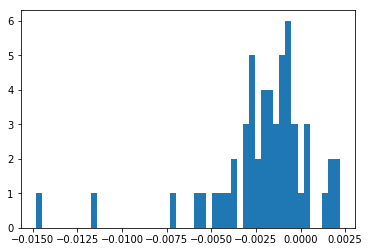

In [93]:
plt.hist(s.values,50);

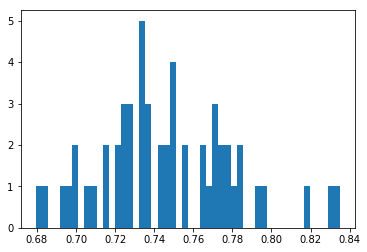

In [95]:
plt.hist(d.values,50);

In [108]:
s=df[['item_nbr','diff']].groupby('item_nbr').mean()
s.columns=['mean']
d=df[['item_nbr','diff']].groupby('item_nbr').std()

In [112]:
pd.concat([s,d],1).sort_values('mean')

mean      diff
item_nbr                    
1993625  -0.735729  1.337573
1948220  -0.680742  1.509417
2008567  -0.520299  1.666830
1950263  -0.455219  1.153274
2127114  -0.260248  0.800170
2109909  -0.240052  1.103274
1730015  -0.176823  1.099683
2010082  -0.158159  0.942853
2040614  -0.150010  0.637587
2027559  -0.140876  1.932276
2072545  -0.114875  1.679828
2017583  -0.112691  0.550244
2068536  -0.109856  0.975870
2000873  -0.099517  0.642535
1949662  -0.099246  1.096284
1963892  -0.084905  1.063183
2004754  -0.084625  0.588045
2113914  -0.074780  1.596538
2124052  -0.072922  1.077839
99197    -0.071304  0.671547
2081095  -0.070657  0.727069
1386120  -0.068741  0.792246
2035293  -0.068062  0.794027
2046805  -0.066276  0.881446
1980532  -0.065187  0.853157
2088922  -0.064884  0.878128
1967566  -0.061254  0.829288
1392262  -0.058896  0.897942
1945572  -0.058383  0.843566
1695872  -0.055728  0.991558
...            ...       ...
2010755   0.161214  1.491804
1239986   0.183245  1.125867
586423    0.198808  1.206925
850389    0.201069  1.271541
2118662   0.221611  0.702739
2060910   0.238843  1.081669
2060787   0.245062  1.088197
2061033   0.253760  1.109532
2061025   0.257854  1.148177
2010972   0.263203  1.596600
2010837   0.267319  1.333541
2061214   0.278976  1.297766
2060793   0.300516  1.282223
2011054   0.374643  1.873956
557241    0.376988  1.351631
208530    0.390009  1.763455
2058764   0.401234  1.545734
850388    0.429916  1.622588
2011032   0.441238  1.431613
2003392   0.448964  1.281047
1109235   0.464096  1.510828
603255    0.546462  1.777274
354964    0.652321  2.004764
1924661   0.662768  1.212456
1352758   0.693018  0.909328
2010235   0.821102  1.792656
1924662   0.830448  1.365796
1036317   1.019596  1.308722
856688    1.136385  1.867844
856687    1.152099  1.930087

[3997 rows x 2 columns]

In [45]:
import statsmodels.api as sm  

/home/spark/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [78]:
 from scipy import stats

In [85]:
def f(store_nbr,item_nbr):
    s=df[(df['store_nbr']==store_nbr) & (df['item_nbr']==item_nbr)][['date','diff']]
    s.index=s['date']
    s=s.drop('date',axis=1)['diff']
    print s.mean(),s.std()
    plt.plot(s.values);
    z = np.polyfit(range(len(s)),s.values,1)
    print "{0}x + {1}".format(*z)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(s)),s.values)
    print "{0}x + {1}, pval={2}, r2={3}".format(slope,intercept,p_value,r_value**2)
    

0.84582722187 1.52762842178
-0.111047388433x + 1.51211152496
-0.111047388433x + 1.51211155247, pval=0.348631967422, r2=0.0801440684051


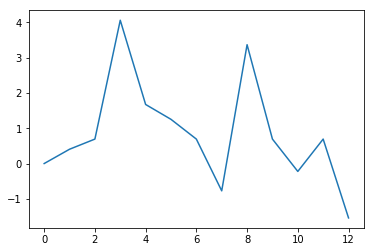

In [113]:
f(25,856687)

-0.00527479778975 0.806670308113
-2.57603615717e-05x + 0.011933124188
-2.57603615717e-05x + 0.0119331251371, pval=0.652395072068, r2=0.000152025797213


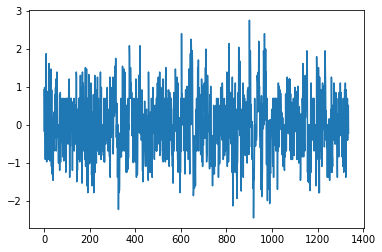

In [86]:
f(25,105574)

-0.00785947591066 0.653012156487
-1.37294029242e-05x + 0.00301421391761
-1.37294029242e-05x + 0.00301421493061, pval=0.701857617905, r2=9.26002086082e-05


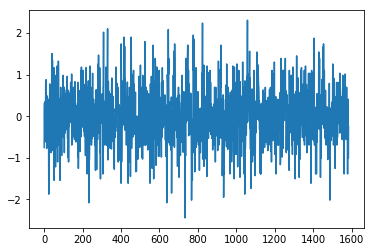

In [89]:
f(37,105574)

0.00610949192196 0.773291289806
4.37489819032e-06x + 0.0028939363737
4.37489819032e-06x + 0.00289393756112, pval=0.926623181015, r2=5.77549901373e-06


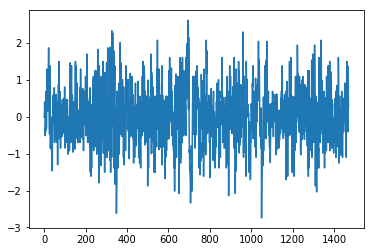

In [87]:
f(25,105575)

In [73]:
import gc
gc.collect()

13171